# AIM

### The primary goal of this project is to perform sentiment analysis on a dataset of cell phone reviews from amazon and compare the effectiveness of traditional machine learning models (e.g., SVM, Naive-Bayes) with deep learning models (e.g., LSTM, GRU), while also visualizing the distribution of sentiments and addressing potential sources of bias in the dataset.

#### Group Members - Riya Virani (002747048), Tanmay Shekhar (002747412)

# Steps Followed:

1. EDA with Visualization to understand the data
2. Data Preprocessing - Data Undersampling
3. Feature Engineering
4. Model Building & Train the Models
5. Make Predictions
6. Evaluate Model Performance
7. Visualize Results on Confusion Matrices and ROC Curves

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import itertools
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam
from keras.layers import Embedding, Flatten, Dense
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tanmayshekhar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanmayshekhar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Evaluating the Amazon Cell Phone Reviews Dataset by performing EDA Techniques

Merging the two datasets ino one based on the primary key/unique column 'asin'

In [3]:
# Load the first CSV file
items = pd.read_csv('/Users/tanmayshekhar/Downloads/ADS_Amazon_ReviewData/20191226-items.csv')

# Load the second CSV file
reviews = pd.read_csv('/Users/tanmayshekhar/Downloads/ADS_Amazon_ReviewData/20191226-reviews.csv')


In [4]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [5]:
reviews.head()


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [6]:
combined_data = pd.merge(items, reviews, on='asin', how='inner')

combined_data.head()


,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [7]:
combined_data.to_csv('combined_data.csv', index=False)

### Reading the Combined csv into a df again 

In [8]:
df = pd.read_csv('combined_data.csv')

# Display the first few rows of the dataframe
df.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [9]:
df.describe()

,rating_x,totalReviews,price,originalPrice,rating_y,helpfulVotes
count,67986.000000,67986.000000,67986.000000,67986.000000,67986.000000,27215.000000
mean,3.766826,373.742800,222.050506,84.057634,3.807916,8.229690
std,0.429197,262.560876,188.863986,201.923373,1.582906,31.954877
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.500000,153.000000,103.980000,0.000000,3.000000,1.000000
50%,3.800000,336.000000,179.990000,0.000000,5.000000,2.000000
75%,4.100000,558.000000,300.550000,0.000000,5.000000,5.000000
max,5.000000,983.000000,999.990000,999.990000,5.000000,990.000000


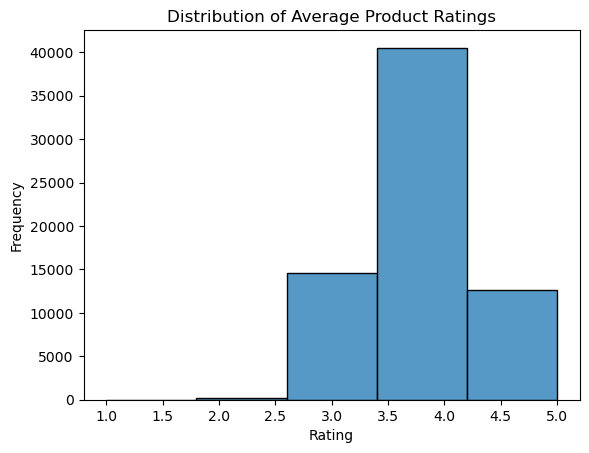

In [10]:
# Data Distribution

sns.histplot(df['rating_x'], kde=False, bins=5)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

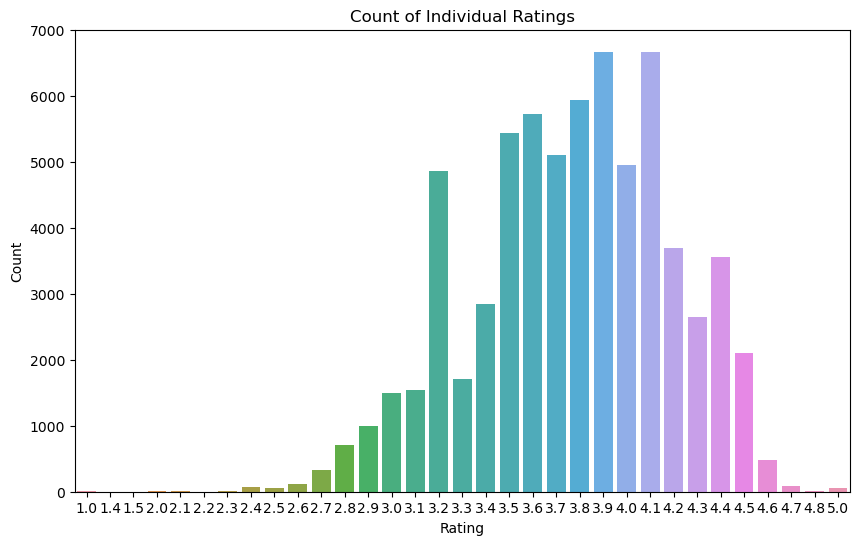

In [11]:
# Ratings Analysis

plt.figure(figsize=(10, 6))
sns.countplot(x='rating_x', data=df)
plt.title('Count of Individual Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

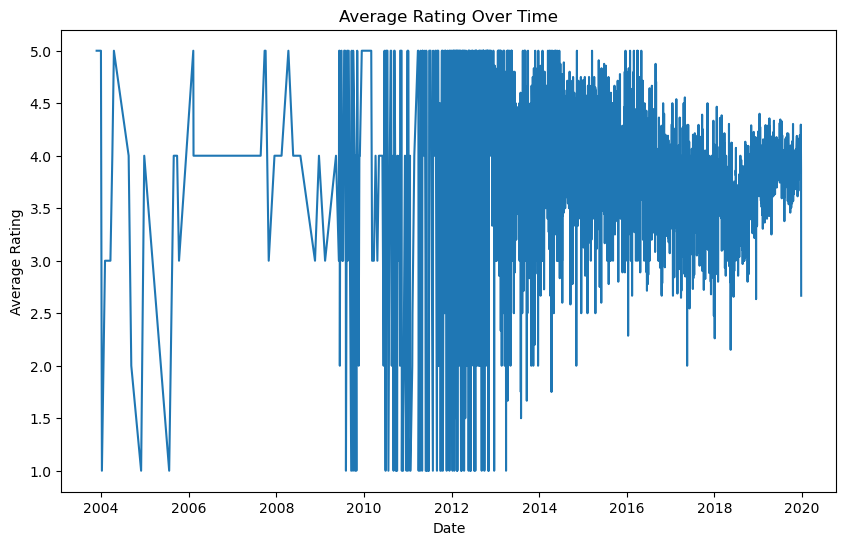

In [12]:
# Time Series Analysis of Ratings

df['date'] = pd.to_datetime(df['date'])  # convert 'date' column to datetime
df.groupby(df['date'].dt.date)['rating_y'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

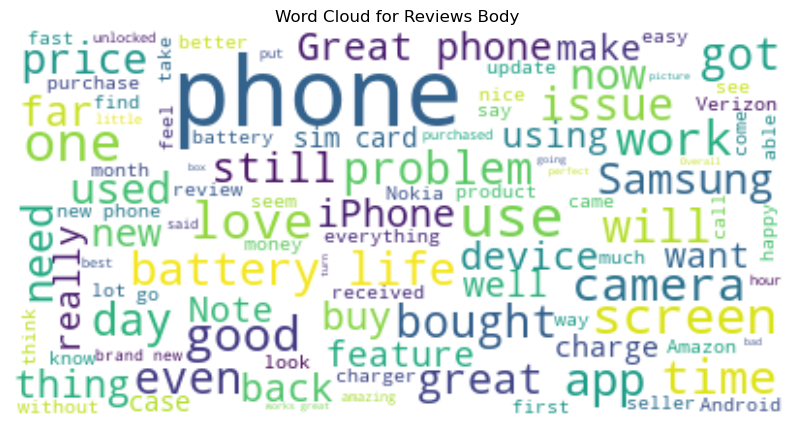

In [13]:
# Text Analysis - Word Cloud for 'body'

text = ' '.join(review for review in df['body'].dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Reviews Body')
plt.show()


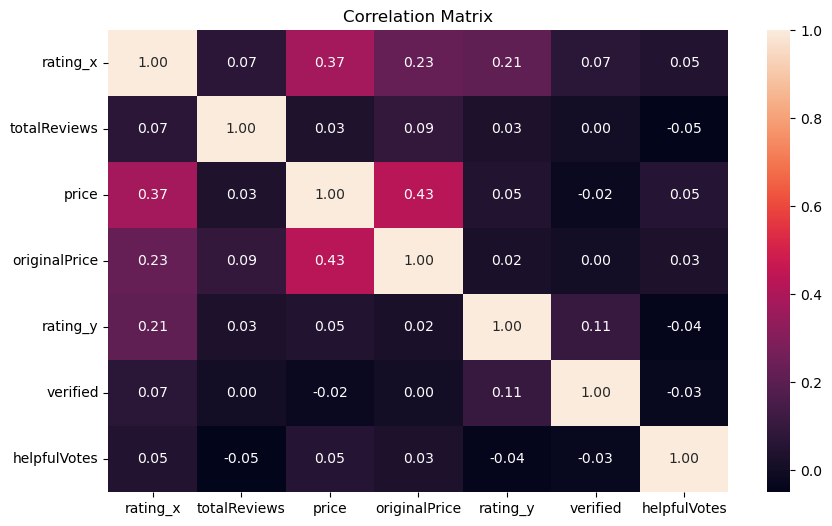

In [14]:
# Correlation Analysis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

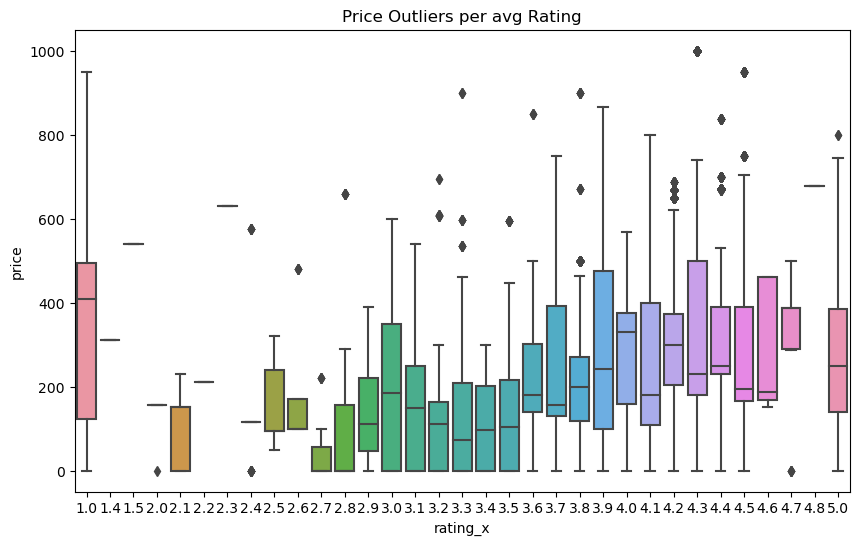

In [15]:
# Anomalies/Outliers Detection

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_x', y='price', data=df)
plt.title('Price Outliers per avg Rating')
plt.show()

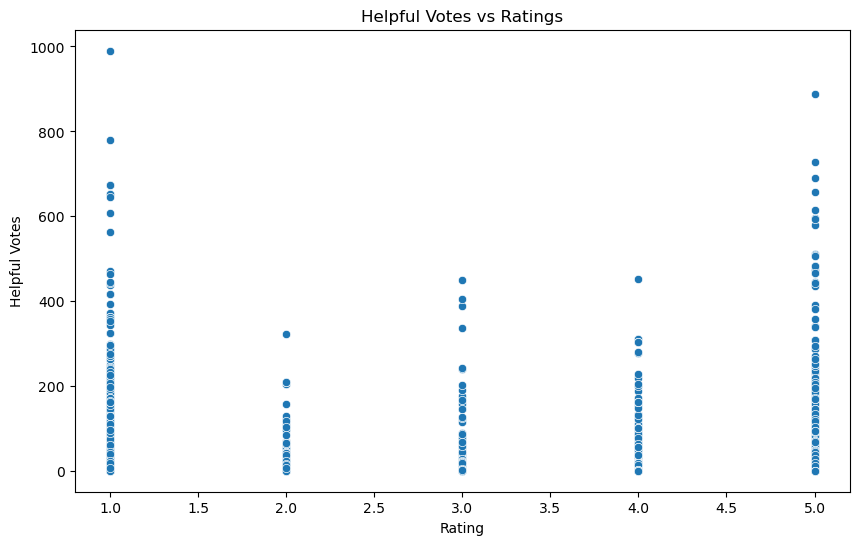

In [16]:
# Scatter plot for helpful votes vs. ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_y', y='helpfulVotes', data=df)
plt.title('Helpful Votes vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()

### Observation



### Data Preprocessing

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({'Column Name': df.columns, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by the missing percentage in descending order
missing_data_info = missing_data_info.sort_values(by='Missing Percentage', ascending=False)

# Print the result
print("Percentage of Missing Data:")
print(missing_data_info)

Percentage of Missing Data:
                 Column Name  Missing Percentage
helpfulVotes    helpfulVotes           59.969700
brand                  brand            0.294178
body                    body            0.030889
title_y              title_y            0.020592
name                    name            0.002942
originalPrice  originalPrice            0.000000
verified            verified            0.000000
date                    date            0.000000
rating_y            rating_y            0.000000
asin                    asin            0.000000
totalReviews    totalReviews            0.000000
reviewUrl          reviewUrl            0.000000
rating_x            rating_x            0.000000
image                  image            0.000000
url                      url            0.000000
title_x              title_x            0.000000
price                  price            0.000000


In [18]:
# Calculate the percentage of "0" values for each numeric column
zero_percentage = (df[df.select_dtypes(include='number') == 0].count() / len(df)) * 100

# Create a DataFrame to display the results
zero_data_info = pd.DataFrame({'Column Name': zero_percentage.index, 'Zero Percentage': zero_percentage.values})

# Sort the DataFrame by the zero percentage in descending order
zero_data_info = zero_data_info.sort_values(by='Zero Percentage', ascending=False)

# Print the result
print("Percentage of '0' Values:")
print(zero_data_info)

Percentage of '0' Values:
      Column Name  Zero Percentage
9   originalPrice        78.992734
8           price        17.290324
15           body         0.000000
14        title_y         0.000000
13       verified         0.000000
12           date         0.000000
11       rating_y         0.000000
10           name         0.000000
0            asin         0.000000
1           brand         0.000000
7    totalReviews         0.000000
6       reviewUrl         0.000000
5        rating_x         0.000000
4           image         0.000000
3             url         0.000000
2         title_x         0.000000
16   helpfulVotes         0.000000


#### Drop columns that are not needed

In [19]:
df = df.drop(['title_x', 'url', 'image', 'reviewUrl', 'originalPrice', 'name'], axis=1)

#### Impute missing values or drop rows/columns with missing values

In [20]:
# Fill missing 'brand' values with 'Unknown'
df['brand'] = df['brand'].fillna('Unknown')

# Convert 'verified' to integer
df['verified'] = df['verified'].astype(int)

# Drop rows where 'price' column is 0
df = df[df['price'] != 0]

# Fill missing 'helpfulVotes' with 0
df['helpfulVotes'] = df['helpfulVotes'].fillna(0)

#### Make column names more relatable

In [21]:
column_mapping = {
    'rating_x': 'avg_rating_per_item',
    'rating_y': 'rating',
    'title_y' : 'review_title',
    'body' : 'review_body'
}

df.rename(columns=column_mapping, inplace=True)
df.columns

Index(['asin', 'brand', 'avg_rating_per_item', 'totalReviews', 'price',
       'rating', 'date', 'verified', 'review_title', 'review_body',
       'helpfulVotes'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56231 entries, 14 to 67985
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asin                 56231 non-null  object        
 1   brand                56231 non-null  object        
 2   avg_rating_per_item  56231 non-null  float64       
 3   totalReviews         56231 non-null  int64         
 4   price                56231 non-null  float64       
 5   rating               56231 non-null  int64         
 6   date                 56231 non-null  datetime64[ns]
 7   verified             56231 non-null  int64         
 8   review_title         56219 non-null  object        
 9   review_body          56213 non-null  object        
 10  helpfulVotes         56231 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 5.1+ MB


#### Drop rows where any of these important columns have missing values

In [23]:
df.dropna(subset=['review_title', 'review_body', 'rating'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56205 entries, 14 to 67985
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asin                 56205 non-null  object        
 1   brand                56205 non-null  object        
 2   avg_rating_per_item  56205 non-null  float64       
 3   totalReviews         56205 non-null  int64         
 4   price                56205 non-null  float64       
 5   rating               56205 non-null  int64         
 6   date                 56205 non-null  datetime64[ns]
 7   verified             56205 non-null  int64         
 8   review_title         56205 non-null  object        
 9   review_body          56205 non-null  object        
 10  helpfulVotes         56205 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 5.1+ MB


#### Drop rows where any of these values have duplicate subsets

In [24]:
df.drop_duplicates(subset=['asin', 'review_title', 'review_body'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55922 entries, 14 to 67985
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asin                 55922 non-null  object        
 1   brand                55922 non-null  object        
 2   avg_rating_per_item  55922 non-null  float64       
 3   totalReviews         55922 non-null  int64         
 4   price                55922 non-null  float64       
 5   rating               55922 non-null  int64         
 6   date                 55922 non-null  datetime64[ns]
 7   verified             55922 non-null  int64         
 8   review_title         55922 non-null  object        
 9   review_body          55922 non-null  object        
 10  helpfulVotes         55922 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 5.1+ MB


#### Now df is ready for further preprocessing such as NLP-specific text cleaning

In [26]:
# Combine review_title and review_body

df['review'] = df['review_title'] + ' ' + df['review_body']
df = df.drop(['review_title', 'review_body'], axis=1)
df.columns

Index(['asin', 'brand', 'avg_rating_per_item', 'totalReviews', 'price',
       'rating', 'date', 'verified', 'helpfulVotes', 'review'],
      dtype='object')

### Text Cleaning

In [27]:
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # remove text within brackets
    text = re.sub(f'[{string.punctuation}]', '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', '', text)  # remove words containing numbers
    text = re.sub('\n', '', text)  # remove line breaks
    text = re.sub('http\S+', '', text)  # remove URLs
    return text

# Apply the clean_text function to the review body
df['review'] = df['review'].apply(clean_text)
df.head()

,asin,brand,avg_rating_per_item,totalReviews,price,rating,date,verified,helpfulVotes,review
14,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-03-05,1,0.0,stupid phone dont buy out of service
15,B0009N5L7K,Motorola,3.0,7,49.95,4,2006-02-09,0,0.0,exellent service i have been with nextel for n...
16,B0009N5L7K,Motorola,3.0,7,49.95,5,2006-02-07,0,0.0,i love it i just got it and have to say its ea...
17,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-12-20,1,0.0,phones locked star because the phones locked ...
18,B0009N5L7K,Motorola,3.0,7,49.95,5,2009-12-13,1,0.0,excellent product the product has been very go...


### Remove Stopwords using NLTK

In [28]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['review'] = df['review'].apply(remove_stopwords)
df.head()

,asin,brand,avg_rating_per_item,totalReviews,price,rating,date,verified,helpfulVotes,review
14,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-03-05,1,0.0,stupid phone dont buy service
15,B0009N5L7K,Motorola,3.0,7,49.95,4,2006-02-09,0,0.0,exellent service nextel nearly year started ti...
16,B0009N5L7K,Motorola,3.0,7,49.95,5,2006-02-07,0,0.0,love got say easy use hear person talking fine...
17,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-12-20,1,0.0,phones locked star phones locked pay additiona...
18,B0009N5L7K,Motorola,3.0,7,49.95,5,2009-12-13,1,0.0,excellent product product good used cell phone...


### Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lemmatize_text)
df.head()

,asin,brand,avg_rating_per_item,totalReviews,price,rating,date,verified,helpfulVotes,review
14,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-03-05,1,0.0,stupid phone dont buy service
15,B0009N5L7K,Motorola,3.0,7,49.95,4,2006-02-09,0,0.0,exellent service nextel nearly year started ti...
16,B0009N5L7K,Motorola,3.0,7,49.95,5,2006-02-07,0,0.0,love got say easy use hear person talking fine...
17,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-12-20,1,0.0,phone locked star phone locked pay additional ...
18,B0009N5L7K,Motorola,3.0,7,49.95,5,2009-12-13,1,0.0,excellent product product good used cell phone...


### Feature Engineering

In [30]:
df['review_length'] = df['review'].apply(len)
df.head()

,asin,brand,avg_rating_per_item,totalReviews,price,rating,date,verified,helpfulVotes,review,review_length
14,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-03-05,1,0.0,stupid phone dont buy service,29
15,B0009N5L7K,Motorola,3.0,7,49.95,4,2006-02-09,0,0.0,exellent service nextel nearly year started ti...,198
16,B0009N5L7K,Motorola,3.0,7,49.95,5,2006-02-07,0,0.0,love got say easy use hear person talking fine...,69
17,B0009N5L7K,Motorola,3.0,7,49.95,1,2016-12-20,1,0.0,phone locked star phone locked pay additional ...,56
18,B0009N5L7K,Motorola,3.0,7,49.95,5,2009-12-13,1,0.0,excellent product product good used cell phone...,118


In [31]:
rating_counts = df['rating'].value_counts().sort_index()
print("Rating Counts:")
print(rating_counts)

Rating Counts:
1    10397
2     3175
3     3895
4     7198
5    31257
Name: rating, dtype: int64


### Dropping the neutral rating (i.e., rating = 3)

In [32]:
df = df[df['rating'] != 3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52027 entries, 14 to 67985
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asin                 52027 non-null  object        
 1   brand                52027 non-null  object        
 2   avg_rating_per_item  52027 non-null  float64       
 3   totalReviews         52027 non-null  int64         
 4   price                52027 non-null  float64       
 5   rating               52027 non-null  int64         
 6   date                 52027 non-null  datetime64[ns]
 7   verified             52027 non-null  int64         
 8   helpfulVotes         52027 non-null  float64       
 9   review               52027 non-null  object        
 10  review_length        52027 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 4.8+ MB


### Sampling the data
#### From the observations we found out that the data is highly unbalanced, hence we are going to perform undersampling on the rating = '5' values to match the count of positive and negative sentiments

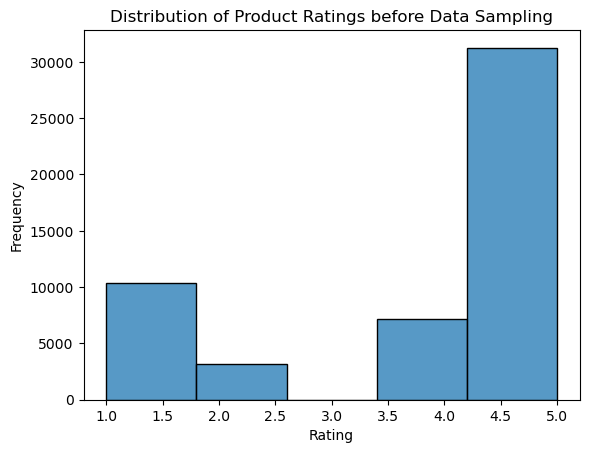

In [33]:
# Data Distribution

sns.histplot(df['rating'], kde=False, bins=5)
plt.title('Distribution of Product Ratings before Data Sampling')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Separate data by ratings
rating_1 = df[df['rating'] == 1]
rating_2 = df[df['rating'] == 2]
rating_4 = df[df['rating'] == 4]
rating_5 = df[df['rating'] == 5]

# Undersample the majority class (Rating 5) to approximately 10,000 records
desired_sample_count = 10000

if len(rating_5) > desired_sample_count:
    rating_5_undersampled = resample(rating_5, n_samples=desired_sample_count, random_state=42)
else:
    rating_5_undersampled = rating_5

# Combine the undersampled majority class with minority classes
balanced_df = pd.concat([rating_1, rating_2, rating_4, rating_5_undersampled])

rating_counts = balanced_df['rating'].value_counts().sort_index()
print("Rating Counts in Ascending Order:")
print(rating_counts)

Rating Counts in Ascending Order:
1    10397
2     3175
4     7198
5    10000
Name: rating, dtype: int64


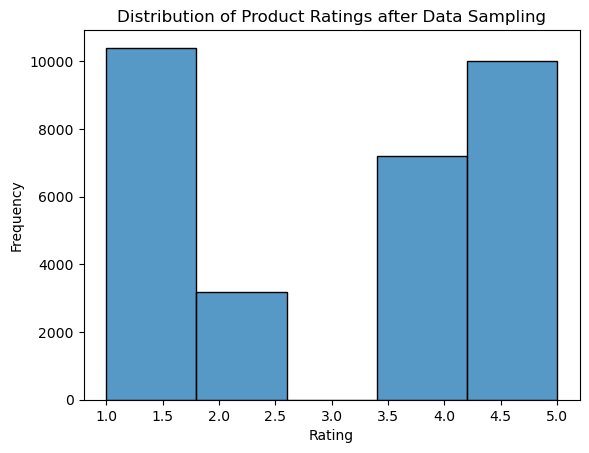

In [35]:
# Data Distribution

sns.histplot(balanced_df['rating'], kde=False, bins=5)
plt.title('Distribution of Product Ratings after Data Sampling')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Proceeding to Modeling and Predictions
### 

In [36]:
# Convert rating to a binary classification (0 for negative, 1 for positive)
balanced_df['target'] = balanced_df['rating'].apply(lambda x: 0 if x < 3 else 1)


In [37]:
# Define features and target variable
X = balanced_df['review']  # Text feature
y = balanced_df['target']  # Target variable


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### 1. Naive Bayes

In [38]:
# Initialize the CountVectorizer
count_vect = CountVectorizer()

# Fit and transform the training data to a document-term matrix
X_train_counts = count_vect.fit_transform(X_train)

# Initialize the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the count vectorized training data to TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Train the Naive Bayes classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [39]:
# Transform the test data

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict the sentiment on the test data
y_pred = clf.predict(X_test_tfidf)

In [40]:
# Classification report for training data
y_train_pred = clf.predict(X_train_tfidf)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing data
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10856
           1       0.91      0.94      0.93     13760

    accuracy                           0.92     24616
   macro avg       0.92      0.91      0.91     24616
weighted avg       0.92      0.92      0.92     24616

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      2716
           1       0.87      0.93      0.90      3438

    accuracy                           0.89      6154
   macro avg       0.89      0.88      0.88      6154
weighted avg       0.89      0.89      0.89      6154



In [41]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2253  463]
 [ 240 3198]]


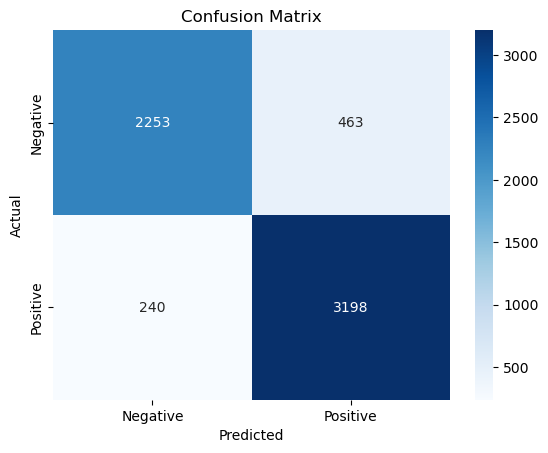

In [42]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

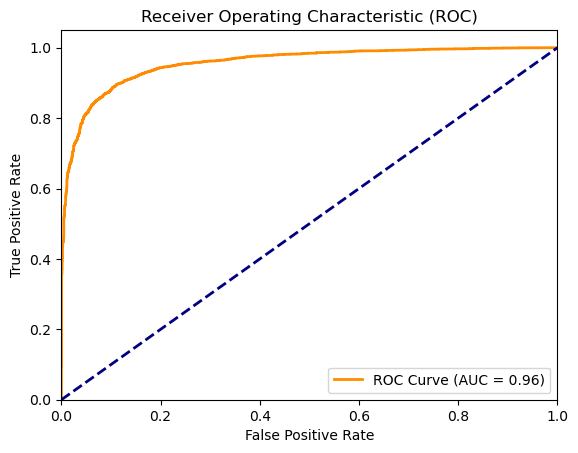

In [43]:
# ROC curve and AUC for testing data
y_pred_prob = clf.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### 2. Support Vector Machines

In [44]:
# Create a pipeline that combines the vectorizer and SVM model
svm_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel='linear')),  
])

In [45]:
# Train the SVM classifier
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(kernel='linear'))])

In [46]:
# Predict the sentiment on the test data
y_pred_svm = svm_pipeline.predict(X_test)

In [47]:
# Classification report for training data
y_train_pred_svm = svm_pipeline.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_svm))
print()

# Classification report for testing data
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_svm))



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10856
           1       0.96      0.95      0.96     13760

    accuracy                           0.95     24616
   macro avg       0.95      0.95      0.95     24616
weighted avg       0.95      0.95      0.95     24616


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2716
           1       0.92      0.91      0.92      3438

    accuracy                           0.91      6154
   macro avg       0.91      0.91      0.91      6154
weighted avg       0.91      0.91      0.91      6154



In [48]:
# Confusion matrix for testing data
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Confusion Matrix:
[[2460  256]
 [ 299 3139]]


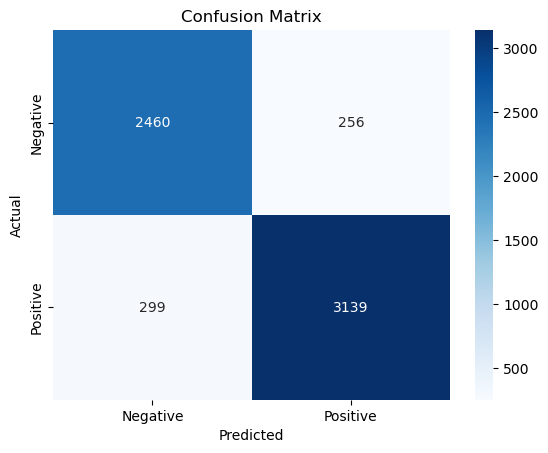

In [49]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

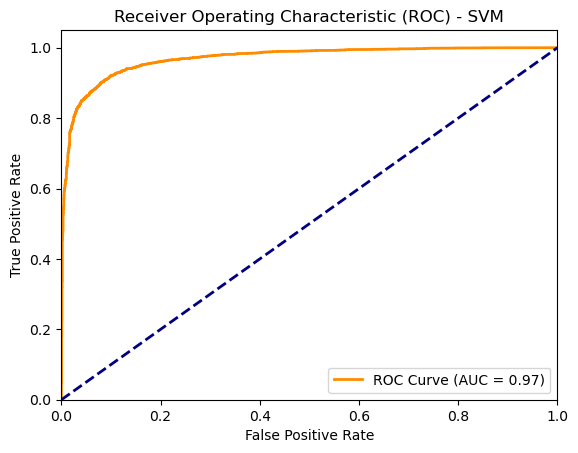

In [50]:
# ROC curve and AUC for testing data
y_pred_prob_svm = svm_pipeline.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc='lower right')
plt.show()

### 3. LSTM

In [51]:
# Tokenize the text data

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 213  # we set this to the length that we want our sequences to be

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)  

# Convert the train and test texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_data = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_data = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)


In [52]:
# Building the model
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train_data, y_train, batch_size=32, epochs=10,
                    validation_data=(X_test_data, y_test), callbacks=[early_stopping])

Epoch 1/10
770/770 [==============================] - 3s 4ms/step - loss: 0.3256 - accuracy: 0.8562 - val_loss: 0.2617 - val_accuracy: 0.8947
Epoch 2/10
770/770 [==============================] - 3s 4ms/step - loss: 0.1663 - accuracy: 0.9391 - val_loss: 0.2584 - val_accuracy: 0.9020
Epoch 3/10
770/770 [==============================] - 3s 4ms/step - loss: 0.0946 - accuracy: 0.9692 - val_loss: 0.2827 - val_accuracy: 0.9019
Epoch 4/10
770/770 [==============================] - 3s 4ms/step - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.3138 - val_accuracy: 0.8967
Epoch 5/10
770/770 [==============================] - 3s 4ms/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.3586 - val_accuracy: 0.8965


In [54]:
test_loss, test_accuracy = model.evaluate(X_test_data, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

193/193 [==============================] - 0s 625us/step - loss: 0.3586 - accuracy: 0.8965
Test Accuracy: 89.65%


In [55]:
# Predictions
y_pred_test = model.predict(X_test_data)
y_pred_train = model.predict(X_train_data)

# Convert predictions to binary (0 or 1)
y_pred_test_binary = (y_pred_test > 0.5).astype("int32")
y_pred_train_binary = (y_pred_train > 0.5).astype("int32")

# Classification Report
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train_binary))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred_test_binary))

770/770 [==============================] - 0s 457us/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10856
           1       0.99      1.00      1.00     13760

    accuracy                           1.00     24616
   macro avg       1.00      1.00      1.00     24616
weighted avg       1.00      1.00      1.00     24616


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2716
           1       0.91      0.90      0.91      3438

    accuracy                           0.90      6154
   macro avg       0.89      0.90      0.90      6154
weighted avg       0.90      0.90      0.90      6154



In [56]:
cm_lstm = confusion_matrix(y_test, y_pred_test_binary)
print("Confusion Matrix:")
print(cm_lstm)



Confusion Matrix:
[[2413  303]
 [ 334 3104]]


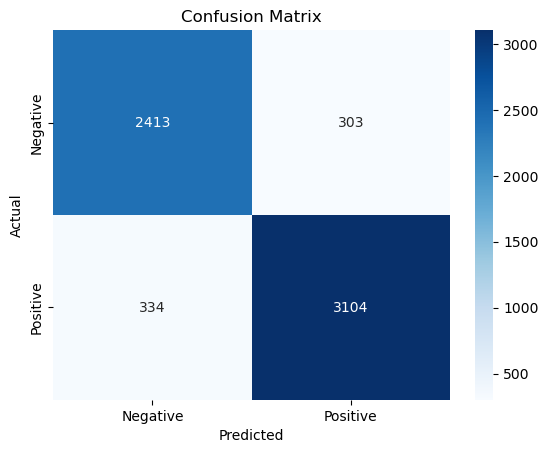

In [57]:
# Plotting the confusion matrix
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

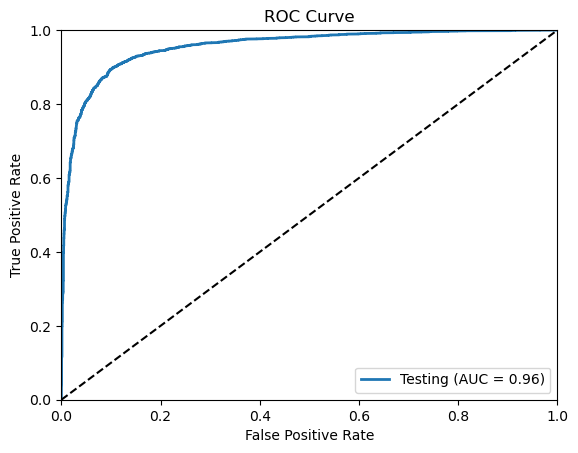

In [58]:
# ROC Curve function
def plot_roc_curve(y_true, y_score, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=label + f' (AUC = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Plot ROC Curve for testing data
plot_roc_curve(y_test, y_pred_test.ravel(), 'Testing')
plt.legend(loc="lower right")
plt.show()

### 4. GRU

In [59]:
# Defining the model
model = Sequential()

# Size of the vocabulary is given by MAX_NUM_WORDS and an embedding dimension of 128
EMBEDDING_DIM = 128

model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(GRU(units=128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 213, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1387393 (5.29 MB)
Trainable params: 1387393 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Train the model
BATCH_SIZE = 128
EPOCHS = 10

history = model.fit(X_train_data, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1)

Epoch 1/10
174/174 [==============================] - 43s 243ms/step - loss: 0.3695 - accuracy: 0.8284 - val_loss: 0.2373 - val_accuracy: 0.9082
Epoch 2/10
174/174 [==============================] - 43s 247ms/step - loss: 0.1835 - accuracy: 0.9340 - val_loss: 0.2229 - val_accuracy: 0.9192
Epoch 3/10
174/174 [==============================] - 43s 245ms/step - loss: 0.1358 - accuracy: 0.9527 - val_loss: 0.2322 - val_accuracy: 0.9216
Epoch 4/10
174/174 [==============================] - 43s 245ms/step - loss: 0.1048 - accuracy: 0.9647 - val_loss: 0.2787 - val_accuracy: 0.9127
Epoch 5/10
174/174 [==============================] - 43s 247ms/step - loss: 0.0742 - accuracy: 0.9760 - val_loss: 0.3423 - val_accuracy: 0.8940
Epoch 6/10
174/174 [==============================] - 43s 245ms/step - loss: 0.0625 - accuracy: 0.9790 - val_loss: 0.3808 - val_accuracy: 0.9001
Epoch 7/10
174/174 [==============================] - 43s 246ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.3877 - val_ac

In [61]:
# Test

test_loss, test_accuracy = model.evaluate(X_test_data, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


193/193 [==============================] - 5s 27ms/step - loss: 0.5008 - accuracy: 0.8911
Test Accuracy: 89.11%


In [62]:
# Make predictions on the training data
y_train_pred_prob = model.predict(X_train_data)
y_train_pred = (y_train_pred_prob > 0.5).astype("int32")

# Make predictions on the testing data
y_test_pred_prob = model.predict(X_test_data)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

# Generate and print classification report for training data
print('Training Classification Report:\n', classification_report(y_train, y_train_pred, target_names=['Negative', 'Positive']))

# Generate and print classification report for testing data
print('Testing Classification Report:\n', classification_report(y_test, y_test_pred, target_names=['Negative', 'Positive']))



193/193 [==============================] - 4s 23ms/step
Training Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      0.98      0.98     10856
    Positive       0.98      0.99      0.99     13760

    accuracy                           0.98     24616
   macro avg       0.98      0.98      0.98     24616
weighted avg       0.98      0.98      0.98     24616

Testing Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      2716
    Positive       0.90      0.91      0.90      3438

    accuracy                           0.89      6154
   macro avg       0.89      0.89      0.89      6154
weighted avg       0.89      0.89      0.89      6154



In [63]:
# Confusion Matrix
cm_gru = confusion_matrix(y_test, y_test_pred)
print(cm_gru)

[[2369  347]
 [ 323 3115]]


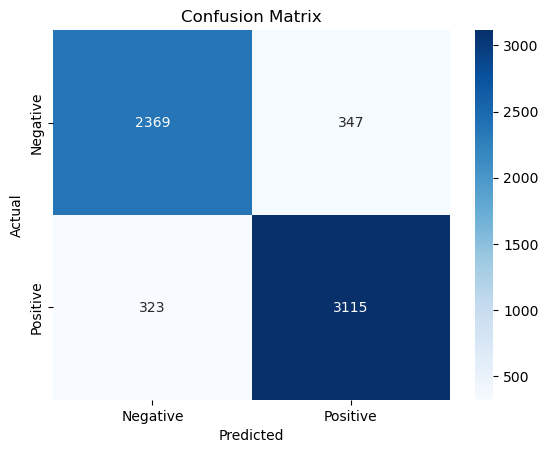

In [64]:
# Plotting the confusion matrix
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

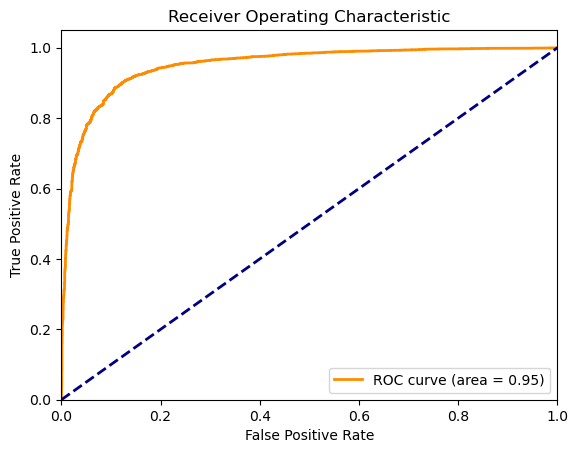

In [65]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test.ravel(), y_test_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()